# Data Science 325

## Clustering

### Learning Objectives:

* Students will learn the motivation for classification techniques.
* Students will be exposed to two algorithmic approaches to classification: decision trees
* Students will practice the application of these techniques and visualize their results

## load libraries

In [8]:
!pip install graphviz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import tree
import graphviz
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("paper")
np.random.seed(0)
import warnings 
warnings.filterwarnings("ignore")

# zoo animals

### Attribute Information:

1. animal name: Unique for each instance
2. hair: Boolean
3. feathers: Boolean
4. eggs: Boolean
5. milk: Boolean
6. airborne: Boolean
7. aquatic: Boolean
8. predator: Boolean
9. toothed: Boolean
10. backbone: Boolean
11. breathes: Boolean
12. venomous: Boolean
13. fins: Boolean
14. legs: Numeric (set of values: {0,2,4,5,6,8})
15. tail: Boolean
16. domestic: Boolean
17. catsize: Boolean
18. type: Numeric (integer values in range [1,7])

Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)

We have 7 target :
1. Mammal
2. Bird
3. Reptile
4. Fish
5. Amphibian
6. Bug
7. Invertebrate

[http://archive.ics.uci.edu/ml/datasets/Zoo](http://archive.ics.uci.edu/ml/datasets/Zoo)

Donor:

    Richard S. Forsyth
    8 Grosvenor Avenue
    Mapperley Park
    Nottingham NG3 5DX
    0602-621676

In [9]:
#Loading Data set
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
df = pd.read_csv(web_addr+"zoo.csv")
df.head(1)
class_names = ['Mammal','Bird','Reptile','Fish','Amphibian','Bug','Invertebrate']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


Drop animal name

In [5]:
df2 = df.drop(['animal_name'], axis=1)
df2.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


In [6]:
#make our features and class name vectors
features = df2.columns[:-1].tolist()

See how many animals of each class.

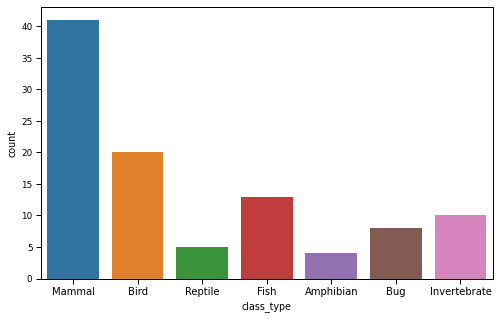

In [7]:
plt.figure(figsize = (8.1,5))
ax =sns.countplot(df2.class_type); 
ax.set_xticklabels(class_names, fontsize=10)
plt.show()

In [10]:
X = df2.drop("class_type",axis = 1)# input data
y = df2.class_type.values# target data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0,shuffle=True)

## zoo animals: decision tree

In [11]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 0)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
acc = accuracy_score(y_test, predicted)
cm = confusion_matrix(y_test, predicted)

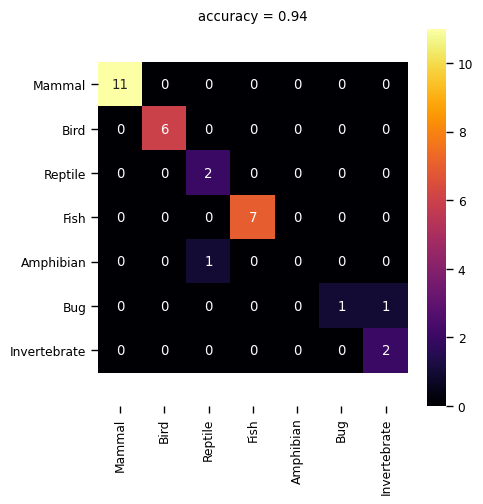

In [12]:
fig, ax = plt.subplots(figsize=(5, 5),dpi= 100)
ax =sns.heatmap(cm,annot = True,xticklabels = class_names,yticklabels = class_names,cmap = "inferno")
plt.title('accuracy = %2.2f'%acc)
ax.axis('equal')
plt.show()

view feature importance

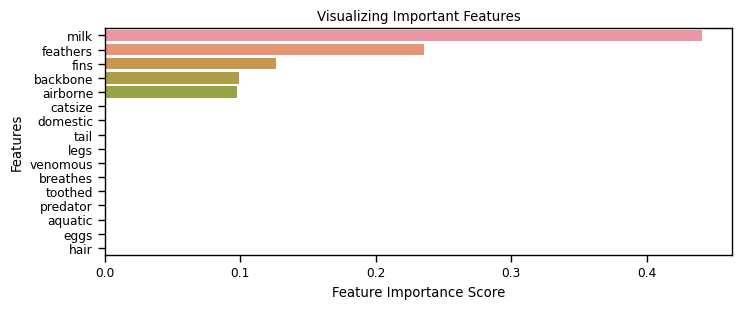

In [13]:
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
# Creating a bar plot
fig, ax = plt.subplots(figsize=(8.1, 3),dpi= 100)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

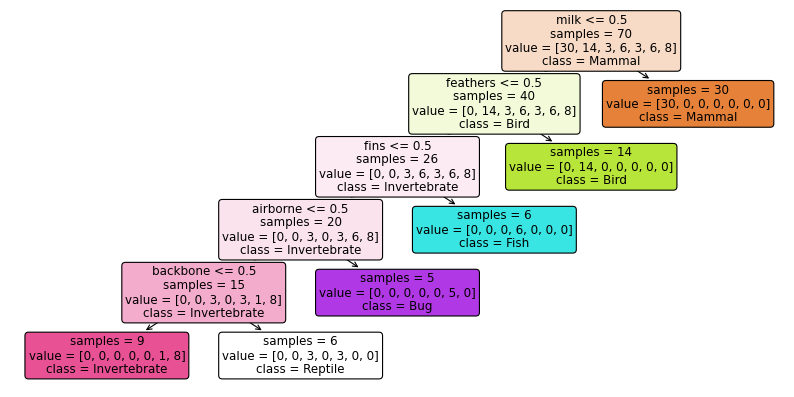

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=100)
tree.plot_tree(clf,
               feature_names = features, 
               class_names=class_names,
               filled = True,rounded=True,impurity = False,proportion = False);
plt.show()

We'll use our next examples to explore how use random forest and optimize the hyperparameters to get better accuracy.

# glass dataset

A data frame with 214 observation containing examples of the chemical analysis of 7 different types of glass. The problem is to forecast the type of class on basis of the chemical analysis. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence (if it is correctly identified!).

The columns in this dataset are:

1. RI: refractive index
2. Na: Sodium
3. Mg: Magnesium
4. Al: Aluminum
5. Si: Silica
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron
10. Type of glass (Target label)

The Target label, Type of Glass has 6 classes:

1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps



### Data Set Information
Extraction was done by B. German, Central Research Establishment, Home Office Forensic Science Service, Aldermaston, Reading, Berkshire RG7 4PN Donor: Vina Spiehler, Ph.D., DABFT, Diagnostic Products Corporation

Data Set Information:

Among the certified rice grown in TURKEY, the Osmancik species, which has a large planting area since 1997 and the Cammeo species grown since 2014 have been selected for the study. When looking at the general characteristics of Osmancik species, they have a wide, long, glassy and dull appearance. When looking at the general characteristics of the Cammeo species, they have wide and long, glassy and dull in appearance. A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.


#### Attribute Information:

1. Area: Returns the number of pixels within the boundaries of the rice grain.
2. Perimeter: Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain.
3. Major Axis Length: The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives.
4. Minor Axis Length: The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives.
5. Eccentricity: It measures how round the ellipse, which has the same moments as the rice grain, is.
6. Convex Area: Returns the pixel count of the smallest convex shell of the region formed by the rice grain.
7. Extent: Returns the ratio of the regionformed by the rice grain to the bounding box pixels.
8. Class: Cammeo and Osmancik rices

CINAR, I. and KOKLU, M., (2019). “Classification of Rice Varieties Using Artificial Intelligence Methods.” International Journal of Intelligent Systems and Applications in Engineering, 7(3), 188-194.

DOI: https://doi.org/10.18201/ijisae.2019355381

In [15]:
#Loading Data set
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
df = pd.read_csv(web_addr+"glass.csv")
df.head(1)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,1


In [16]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Check for null / nan. We do not have missing values, Great!

In [17]:
df.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Drop useless data

In [19]:
df = df.drop(['Id'], axis=1)
df.head(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,1


In [20]:
#make our features and class name vectors
feature_names = df.columns[:-1].tolist()
class_names = np.unique(df['Type']).astype('str') #types of glass; 1,2,3,5,6,7 

### counts for each type of glass

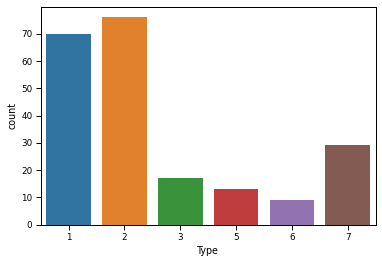

In [21]:
sns.countplot(x=df['Type'])
plt.show()

In [22]:
df.groupby('Type', as_index=False).mean()

,Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


### correlations

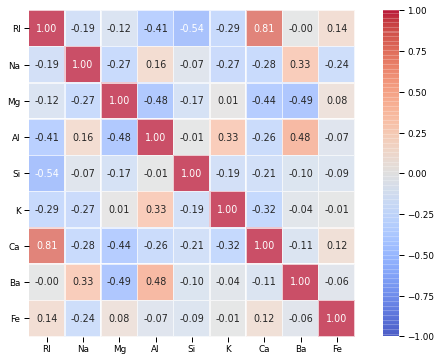

In [23]:
corr = df[feature_names].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cbar = True, square = True, annot=True, fmt= '.2f',vmin=-1,
           xticklabels= feature_names, yticklabels= feature_names, alpha = 0.7,   cmap= 'coolwarm', linewidth=.5)
plt.yticks(rotation=0) 
plt.show()

In [24]:
#Correlations between features, get features 
corrAbs= corr.abs()
sol = (corrAbs.where(np.triu(np.ones(corrAbs.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
print(sol)

RI  Ca    0.810403
    Si    0.542052
Mg  Ba    0.492262
    Al    0.481799
Al  Ba    0.479404
Mg  Ca    0.443750
RI  Al    0.407326
Na  Ba    0.326603
Al  K     0.325958
K   Ca    0.317836
RI  K     0.289833
Na  Ca    0.275442
    Mg    0.273732
    K     0.266087
Al  Ca    0.259592
Na  Fe    0.241346
Si  Ca    0.208732
    K     0.193331
RI  Na    0.191885
Mg  Si    0.165927
Na  Al    0.156794
RI  Fe    0.143010
Ca  Fe    0.124968
RI  Mg    0.122274
Ca  Ba    0.112841
Si  Ba    0.102151
    Fe    0.094201
Mg  Fe    0.083060
Al  Fe    0.074402
Na  Si    0.069809
Ba  Fe    0.058692
K   Ba    0.042618
    Fe    0.007719
Al  Si    0.005524
Mg  K     0.005396
RI  Ba    0.000386
dtype: float64


### prepare dataset

### split data into train and test

In [25]:
X = df[feature_names] 
y = df['Type'] 
cn = np.unique(y)
#split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0,shuffle=True)
#scale X
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

## glass dataset: decision tree

In [26]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 1)
clf.fit(X_train_std, y_train)
predicted = clf.predict(X_test_std)
acc = accuracy_score(y_test, predicted)
cm = confusion_matrix(y_test, predicted)

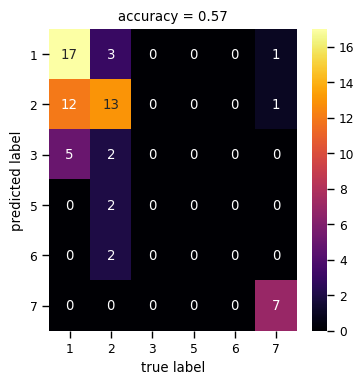

In [27]:
fig, ax = plt.subplots(figsize=(4, 4),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno",vmin=0,xticklabels=class_names,yticklabels=class_names)
plt.yticks(rotation=0) 
plt.title('accuracy = %2.2f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Can use our random forest (or decision tree) to get relative feature importance

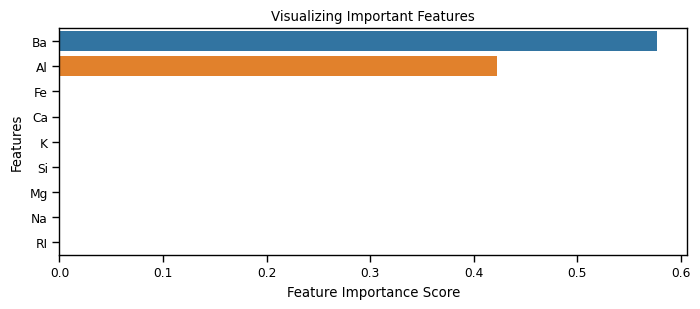

In [28]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
# Creating a bar plot
fig, ax = plt.subplots(figsize=(8.1, 3),dpi= 100)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Plot the decision tree

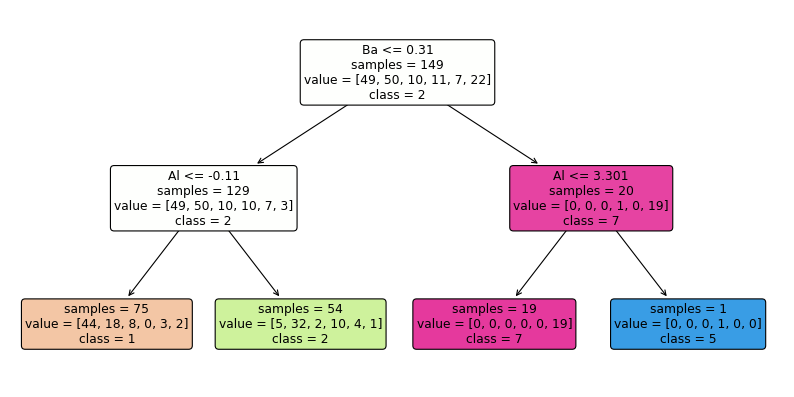

In [29]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=100)
tree.plot_tree(clf,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True,rounded=True,impurity = False,proportion = False);
plt.show()

# glass dataset: random forest classifier

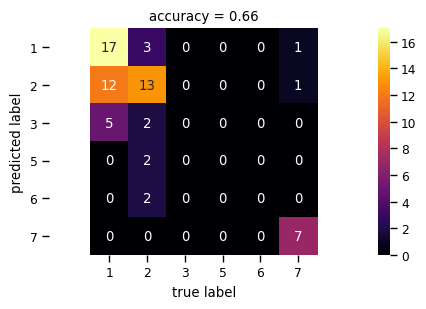

In [30]:
#Random forest classifier
clf = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=5,min_samples_split=5)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, predicted)
fig, ax = plt.subplots(figsize=(5, 3),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno",xticklabels=class_names,yticklabels=class_names)
plt.yticks(rotation=0) 
plt.title('accuracy = %2.2f'%acc)
ax.axis('equal')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

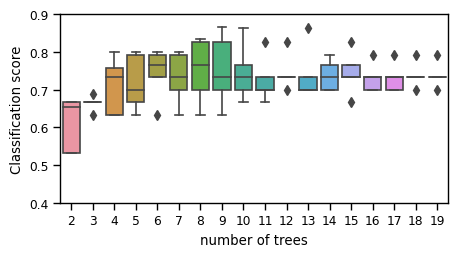

In [31]:
Ns = np.arange(2,20)
scores= []
for i in range(Ns.shape[0]):
    clf = RandomForestClassifier(n_estimators=Ns[i],random_state=0,max_depth=5,min_samples_split=5)
    validated = cross_val_score(clf,X_train_std, y_train,cv=5)
    scores.append(validated)
fig, ax = plt.subplots(figsize=(5, 2.5),dpi= 100)
sns.boxplot(data=scores)
ax.set_xticklabels(Ns)
plt.ylim(0.4,0.9)
plt.xlabel('number of trees')
plt.ylabel('Classification score')
plt.show()

## use gridsearchcv

In [33]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [6,8],
    'max_features': [3,5],
    'n_estimators': [40,60,80,100,150,200,400],
}
#Random forest classifier
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2,scoring='accuracy')
grid_search.fit(X_train_std, y_train)
print(grid_search.best_params_)
clf_best = grid_search.best_estimator_;
#my best is
#{'max_depth': 10, 'max_features': 3, 'n_estimators': 100}

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 445 tasks      | elapsed:   22.4s


{'criterion': 'entropy', 'max_depth': 6, 'max_features': 5, 'n_estimators': 80}


[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:   30.1s finished


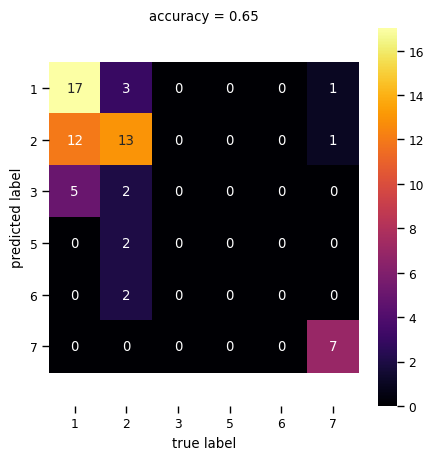

In [34]:
y_pred = clf_best.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, predicted)
fig, ax = plt.subplots(figsize=(5, 5),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno",xticklabels=class_names,yticklabels=class_names)
plt.yticks(rotation=0) 
plt.title('accuracy = %2.2f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
ax.axis('equal')
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.55      0.76      0.64        21
           2       0.68      0.58      0.62        26
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         2
           7       0.88      1.00      0.93         7

    accuracy                           0.65        65
   macro avg       0.60      0.72      0.64        65
weighted avg       0.59      0.65      0.61        65



We see that overall model identifies most of the glass types correctly - type 1,2, 5 and 7, but not the rest. It could be due to the dataset being unbalanced in number of instances of each type. There is also some confusion among type 1, 2 and 3.

# tic-tac-toe - encoding features

### Attribute Information:

1. top-left-square: {x,o,b}
2. top-middle-square: {x,o,b}
3. top-right-square: {x,o,b}
4. middle-left-square: {x,o,b}
5. middle-middle-square: {x,o,b}
6. middle-right-square: {x,o,b}
7. bottom-left-square: {x,o,b}
8. bottom-middle-square: {x,o,b}
9. bottom-right-square: {x,o,b}
10. Class: {positive,negative}

#### Data Set Information:

This database encodes the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first. The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three-in-a-row").

In [ ]:
#load the data
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
df = pd.read_csv(web_addr+"tic-tac-toe.csv")
class_names = ['tie','win']
df.head(1)
sns.countplot(x=df['class'])
plt.show()

In [ ]:
df2 = df.copy()
le = preprocessing.LabelEncoder()
for col in df.columns:
    df2[col] = le.fit_transform(df[col])
features=(list(df.columns[:-1]))
print(features)
X = df2[features]
y = df2['class']
#split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0,shuffle=True)

### tic-tac-toe: decision tree

In [ ]:
dt = DecisionTreeClassifier(min_samples_split=20,random_state=99,max_depth=4)
# dt = DecisionTreeClassifier(min_samples_split=20,max_depth=5,random_state=99)
clf=dt.fit(X_train,y_train)
acc = clf.score(X_test,y_test)
print ("Acurracy: ", acc)

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
# Creating a bar plot
fig, ax = plt.subplots(figsize=(8.1, 3),dpi= 100)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,3), dpi=200)
tree.plot_tree(clf,
               feature_names = features, 
               class_names=class_names,
               filled = True,rounded=True,impurity = False,proportion = False);
plt.show()

In [ ]:
#{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
param_grid = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 12))), 
    "min_samples_split":[ 2, 3, 4, 6, 8, 10], 
    "min_samples_leaf":list(range(2, 10)), 
}
clf = DecisionTreeClassifier(random_state=0)
tree_cv = GridSearchCV(estimator=clf, param_grid=param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#
clf = DecisionTreeClassifier(**best_params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 3),dpi= 100)
ax =sns.heatmap(cm/np.sum(cm),annot = True,cmap = "inferno",xticklabels=class_names,yticklabels=class_names)
plt.yticks(rotation=0) 
plt.title('accuracy = %3.3f'%acc)
ax.axis('equal')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### tic-tac-toe: random forest

In [ ]:
#random forest
#my best
#{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
param_grid = {
    "n_estimators": [50, 100,200,400],
    "criterion":("gini", "entropy"), 
    "max_depth":([6, 12]), 
    "min_samples_split":[2, 4], 
    "min_samples_leaf":[2, 4], 
}
#Random forest classifier
clf = RandomForestClassifier(bootstrap=False,random_state=0)
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
#
clf = RandomForestClassifier(**best_params,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 3),dpi= 100)
ax =sns.heatmap(cm/np.sum(cm),annot = True,cmap = "inferno",xticklabels=class_names,yticklabels=class_names)
plt.yticks(rotation=0) 
plt.title('accuracy = %3.3f'%acc)
ax.axis('equal')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()